In [1]:
# NO CODE 

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
# NO CODE

def simulate_T1_T2(N, n):
    tanks = np.arange(1, N+1)
    sample = np.random.choice(tanks, size=n, replace=False)
    t1 = 2*np.mean(sample)-1
    t2 = max(sample)
    return [t1, t2]

def compare_T1_T2(N, n, repetitions):
    tbl = Table(['2*Mean - 1', 'Max'])
    for i in np.arange(repetitions):
        tbl.append(simulate_T1_T2(N, n))
    
    tbl.hist(bins=np.arange(N/2, 3*N/2))
    plt.title('$N =$'+str(N)+', $n =$'+str(n)+' ('+str(repetitions)+' repetitions)');

def simulate_T2_T3(N, n):
    tanks = np.arange(1, N+1)
    sample = np.random.choice(tanks, size=n, replace=False)
    t2 = max(sample)
    t3 = t2*(n+1)/n - 1
    return [t3, t2]

def compare_T2_T3(N, n, repetitions):
    tbl = Table(['Augmented Max', 'Max'])
    for i in np.arange(repetitions):
        tbl.append(simulate_T2_T3(N, n))
    
    tbl.hist(bins=np.arange(N/2, 3*N/2))
    aug_maxes = tbl.column(0)
    maxes = tbl.column(1)
    print('Average of Augmented Maxes:', np.mean(aug_maxes))
    print('SD of of Augmented Maxes:', np.std(aug_maxes))
    print('Average of Maxes:', np.mean(maxes))
    print('SD of Maxes:', np.std(maxes))
    plt.title('$N =$'+str(N)+', $n =$'+str(n)+' ('+str(repetitions)+' repetitions)');   

## The German Tank Problem, Revisited ##

Earlier in the course we examined the [German tank problem](ch5.4.7) in which statisticians helped the Allies estimate the number of tanks the Germans were manufacturing in World War II. 

In our discussion we had assumed a simpler model than the one the Allies had used. We had started by assuming, as the Allies had, that the tanks were numbered sequentially from 1 through $N$. The goal was to estimate $N$ from the serial numbers on the tanks that were observed. Our model had said that these numbers were like draws *with* replacement from $1, 2, 3, \ldots, N$. But that's not a great model for serial numbers observed on tanks that have been captured or destroyed.

So we will now assume, as the Allies did, that the serial numbers of the observed tanks are random variables $X_1, X_2, \ldots, X_n$ drawn uniformly at random *without* replacement from $\{1, 2, 3, \ldots, N\}$. That is, we have a simple random sample of size $n$ from the population $\{1, 2, 3, \ldots, N\}$, and we have to estimate $N$.

By the symmetry of simple random sampling, each $X_i$ has the same distribution as the others. The distribution is uniform on $\{1, 2, 3, \ldots, N\}$, so for each $i$ we have

$$
E(X_i) ~ = ~ \frac{N+1}{2} 
$$

Hence if $\bar{X}$ is the sample average, then

$$
E(\bar{X}) ~ = ~ \frac{N+1}{2}
$$

This is a linear function of the parameter $N$. So by inverting the function (that is, isolating $N$), we can construct an unbiased estimator of $N$. We have

$$
N ~ = ~ 2E(\bar{X}) - 1
$$

This is an equality of constants, but we'll never know $E(\bar{X})$ because that quantity involves $N$  which is exactly what we are trying to estimate. However, by linearity of expectation, the random variable

$$
T_1 ~ = ~ 2\bar{X} - 1
$$

has expectation $N$ and hence is an unbiased estimator of $N$. It can be calculated based on the sample $X_1, X_2, \ldots, X_n$. 

We have called this estimator $T_1$ because it is the first of several competing estimators of $N$.

Another natural estimator of $N$ is $T_2 = \max\{X_1, X_2, \ldots, X_n\}$, the maximum of the observed numbers. This estimator is clearly biased. It is always less than or equal to $N$. So on average, it will underestimate $N$.

But not by much! The figure below shows the empirical histograms of $T_1$ and $T_2$ based on 10,000 repetitions of drawing a simple random sample of size 30 from the integers $1$ through $300$ and computing $T_1$ and $T_2$ for each sample. You can see that the distribution of the sample maximum $T_2$ puts a lot of mass just to the left of the population maximum $300$.

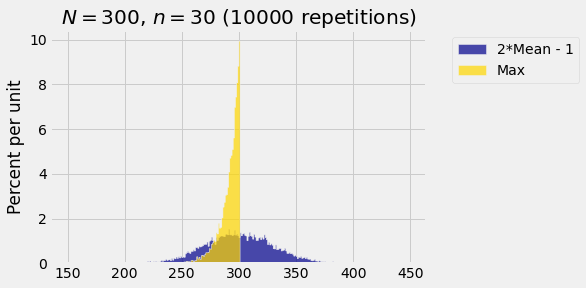

In [3]:
# NO CODE

compare_T1_T2(300, 30, 10000)

The blue histogram shows the empirical distribution of $T_1 = 2\bar{X} - 1$. It is roughly normal because the distribution of $\bar{X}$ is roughly normal: when sampling $30$ elements out of a population of $300$, sampling with and without replacement aren't very different, so the Central Limit Theorem for i.i.d. sample means implies approximate normality. As the number of captured or destroyed tanks was small relative to the number produced, it is reasonable to assume that $n$ is quite a bit smaller than $N$.

The blue histogram is centered at $N = 300$, the value of $N$ that we chose for the simulation. That is because $T_1$ is an unbiased estimator of $N$.

The gold histogram displays the distribution of $T_2 = \max\{1, 2, 3, \ldots, N\}$. It is entirely to the left of $N = 300$, confirming our assertion that $T_2$ underestimates $N$. However, the gold histogram is quite a bit narrower than the blue and puts most of its probability very close to the parameter $N$. This is a situation in which we might prefer to use the somewhat biased estimator $T_2$ over the unbiased but widely variable estimator $T_1$.

### The Bias of the Sample Maximum ###
To calculate the bias of $M$, it helps to imagine a row of $N$ spots for the serial numbers $1$ through $N$, with marks at the spots corresponding to the observed serial numbers. The visualization below shows an outcome in the case $N= 20$ and $n = 3$.

![gaps](../images/all_gaps.png)

- There are $N = 20$ spots in all. 
- From these, we take a simple random sample of size $n = 3$. Those are the gold spots.
- The remaining $N - n = 17$ spots are colored blue.

The $n = 3$ sampled spots create $n+1 = 4$ blue "gaps" between sampled values: one before the leftmost gold spot, two between successive gold spots, and one after the rightmost gold spot that is at position $M$.

The key observation is that because of the symmetry of simple random sampling, the lengths of all four gaps have the same distribution. Therefore all four gaps have the same expected length, which we can find by counting blue and gold spots as follows:

- The gaps are made up of $N - n = 17$ blue spots.
- Since each of the four gaps has the same expected length, the expected length of a single gap is $\frac{17}{4}$.

In general, when the data are a simple random sample of $n$ elements out of $1, 2, 3, \ldots, N$, then 

$$
\text{expected length of gap} ~ = ~ \frac{N-n}{n+1}
$$

The length of the very last gap (the one after $M$) is the random amount by which $M$ underestimates $N$. Let's call the length of that gap $G_{n+1}$ since it is the $(n+1)$th gap starting from the left. 

Then $N = M + G_{n+1}$. Take expectations on both sides and remember that $N$ is a constant:

$$
N ~ = ~ E(M) + E(G_{n+1}) ~ = ~ E(M) + \frac{N-n}{n+1}
$$

So the bias of $M$ is

$$
E(M) - N ~ = ~ \frac{-(N-n)}{n+1}
$$

The bias is negative, consistent with our observation that the sample maximum tends to underestimate $N$.

### A Better Estimator ###

The fact that the bias of $M$ is linear in the parameter $N$ allows us to construct a new unbiased estimator of $N$.

You can of course find $E(M)$ by using the formula for the bias, but we will find $E(M)$ by counting spots from the left, up to and including the gold spot at position $M$. These spots consist of:

- $n$ blue gaps of expected length $\frac{N-n}{n+1}$ each, and
- $n$ gold spots

Hence

$$
E(M) ~ = ~ n\left(\frac{N-n}{n+1}\right) + n ~ = ~ \frac{n}{n+1}(N + 1)
$$

after a little algebra.

This is a linear function of $N$, so you can isolate $N$ to create an unbiased estimator of $N$ just as we did earlier in the section. Isolating $N$ gives

$$
N ~ = ~ E(M)\left(\frac{n+1}{n}\right) - 1
$$

and so it follows that

$$
T_3 ~ = ~  M\left(\frac{n+1}{n}\right) - 1
$$

is an unbiased estimator of $N$. We will call this the "augmented maximum" for reasons that will become clear at the end of this section.

Since $T_3$ is a linear function of $M$, we have

$$
SD(T_3) ~ = ~ \frac{n+1}{n}SD(M) ~ > ~ SD(M)
$$

While $T_3$ is unbiased and $M$ is biased, $T_3$ is more variable than $M$. 

To decide which one to use, notice that $SD(T_3) = (1 + \frac{1}{n})SD(M)$, so the two SDs are almost the same for large $n$. For moderate $n$, the Allied statisticians decided that the reduction in bias was worth the slight increase in variance. 

The simulation below gives you a sense of the relative sizes of all these quantities. The parameter $N$ and the sample size $n$ are the same as in the simulation shown earlier in the section. 

Average of Augmented Maxes: 299.9081133333334
SD of of Augmented Maxes: 9.14184329555527
Average of Maxes: 291.2014
SD of Maxes: 8.84694512473091


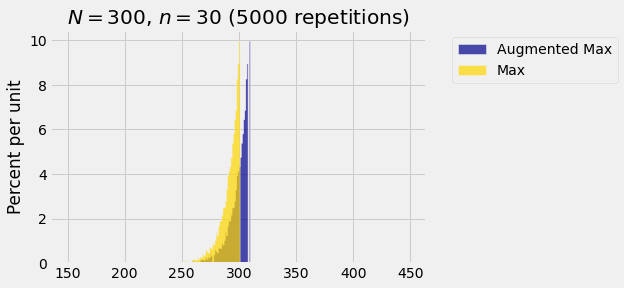

In [4]:
# NO CODE

compare_T2_T3(300, 30, 5000)

### Understanding the Augmented Maximum ###

We gave an algebraic derivation of the augmented maximum $T_3$, but there is another good way to understand the formula.

The reason the sample maximum $M$ is biased is that in the sample we can see all but the last gap, as in the figure below in the case $n = 3$. The red question mark reminds you that the gap to the right of $M$ is invisible to us.

![mystery gap](../images/mystery_gap.png)

If we could see the gap to the right of $M$, we would see $N$. But we can't. So we can try to do the next best thing, which is to augment $M$ by the estimated size of that gap.

Since we can see all of the spots and their colors up to and including $M$, we can see $n$ out of the $n+1$ gaps. The lengths of the gaps all have the same distribution by symmetry, so we can estimate the length of a single gap by the average length of all the gaps that we can see.

We can see $M$ spots, of which $n$ are the sampled values. So the total length of all $n$ visible gaps is $M-n$. Therefore

$$
\text{estimated length of one gap} ~ = ~ \frac{M-n}{n}
$$

and hence we can try to improve upon $M$ using the estimator

$$
M + \frac{M-n}{n}
$$

instead. Now

$$
M + \frac{M-n}{n} ~ = ~ M\left(\frac{n+1}{n}\right) - 1 ~ = T_3
$$

Our new estimator is the same as the unbiased estimator $T_3$ we derived earlier. That is why we have called $T_3$ the augmented maximum: it is the sample maximum plus one estimated gap.

It is possible for the augmented maximum to overestimate $N$. For example, if the observed value of $M$ happens to be $N$, in the calculation of $T_3$ we will have added a gap that we didn't need to add and therefore we will overestimate $N$. 

As before, it is possible for the augmented maximum to underestimate $N$, for example if all the sampled serial numbers are small.

What we have shown is that on average, the augmented maximum gets the answer right, and is only slightly more variable than the maximum.